In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.random as npr
import re

In [161]:
n = 1000
N = 40
a = 1
b = 4
p = npr.beta(a, b, size=n)
pprime = npr.binomial(N, p)/N
p1mp = p*(1-p)
Ns_est = 1.0/((pprime-p)**2/p1mp)
var_est = np.mean(((pprime-p)**2/p1mp))
est1 = 1.0/var_est
est2 = np.median(Ns_est)
print est1, est2

38.30232956735137 86.64264771590337


In [182]:
Ns = [5,10,20,30,40,50,60,70,80,90,100,200,500]
nreps = 1000
a = 1
b = 4
res = {}
ns = [10, 100, 1000]
for n in ns:
    res[n] = {}
    for N in Ns:
        res[n][N] = []
        for rep in range(nreps):
            p = npr.beta(a, b, size=n)
            pprime = npr.binomial(N, p)/N
            sqdev = (pprime-p)**2
            gen_var = np.mean(sqdev)
            p1mp = p*(1-p)
            Ns_est = 1.0/(sqdev/p1mp)
            var_est = np.mean(sqdev/p1mp)
            est1 = 1.0/var_est
            est2 = np.median(Ns_est)
            est_hendy = np.mean(p1mp)/gen_var
            res[n][N].append([est1, est2, est_hendy])
        res[n][N] = np.array(res[n][N])

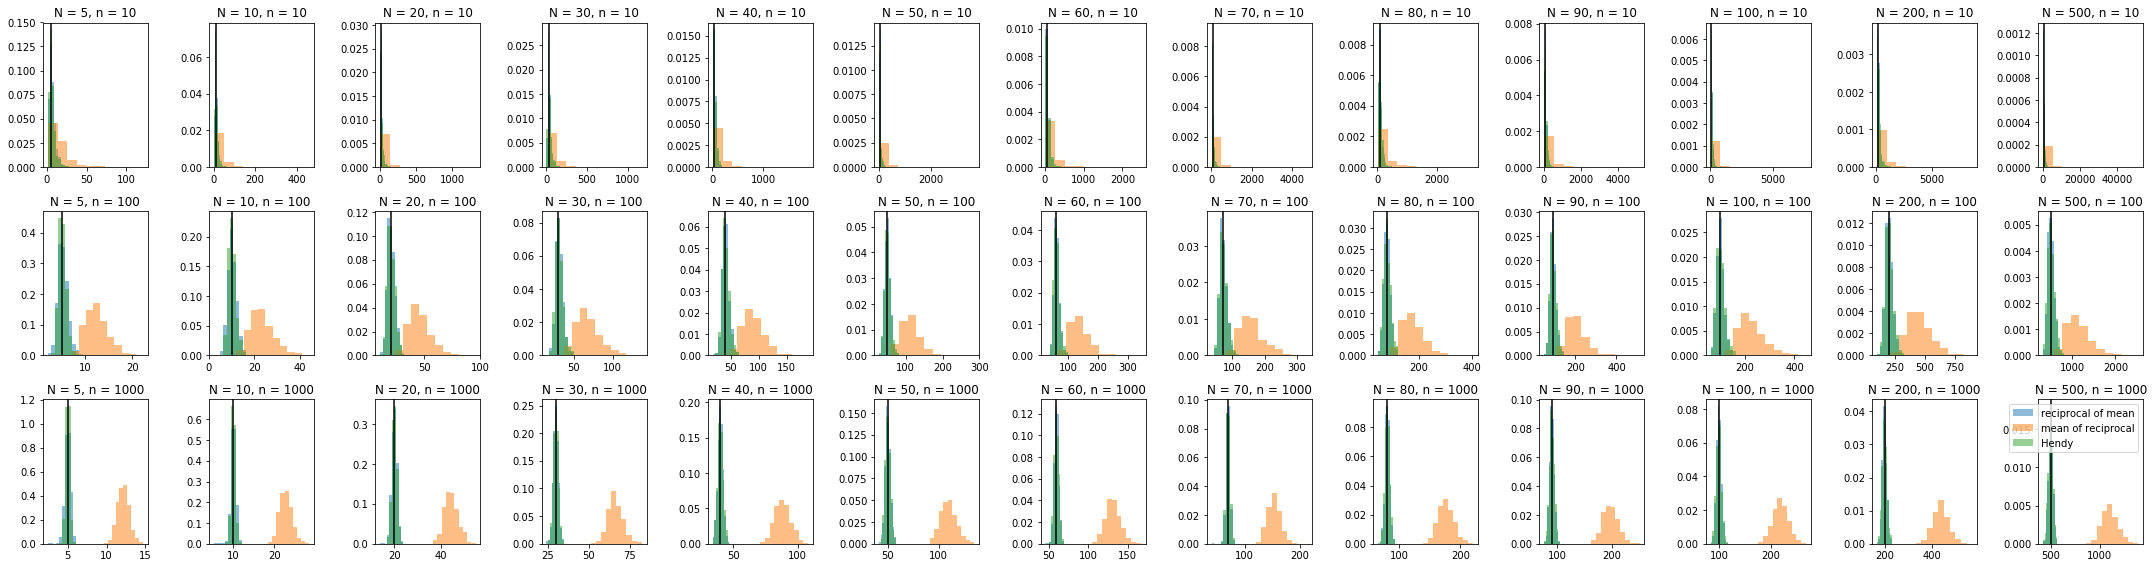

In [197]:
f, axes = plt.subplots(len(ns), len(Ns), figsize=(30,8))
for i, n in enumerate(ns):
    for j, N in enumerate(Ns):
        ax = axes[i,j]
        _, bins, __ = ax.hist(res[n][N][:,0], label='reciprocal of mean', alpha=0.5, normed=True)
        ax.hist(res[n][N][:,1], label='mean of reciprocal', alpha=0.5, normed=True)
        ax.hist(res[n][N][:,2], label='Hendy', alpha=0.5, bins=bins, normed=True)
        ax.axvline(N, color='black')
        ax.set_title('N = {}, n = {}'.format(N,n))
ax.legend()
f.tight_layout()
plt.savefig('bias_estimates.png', dpi=200)

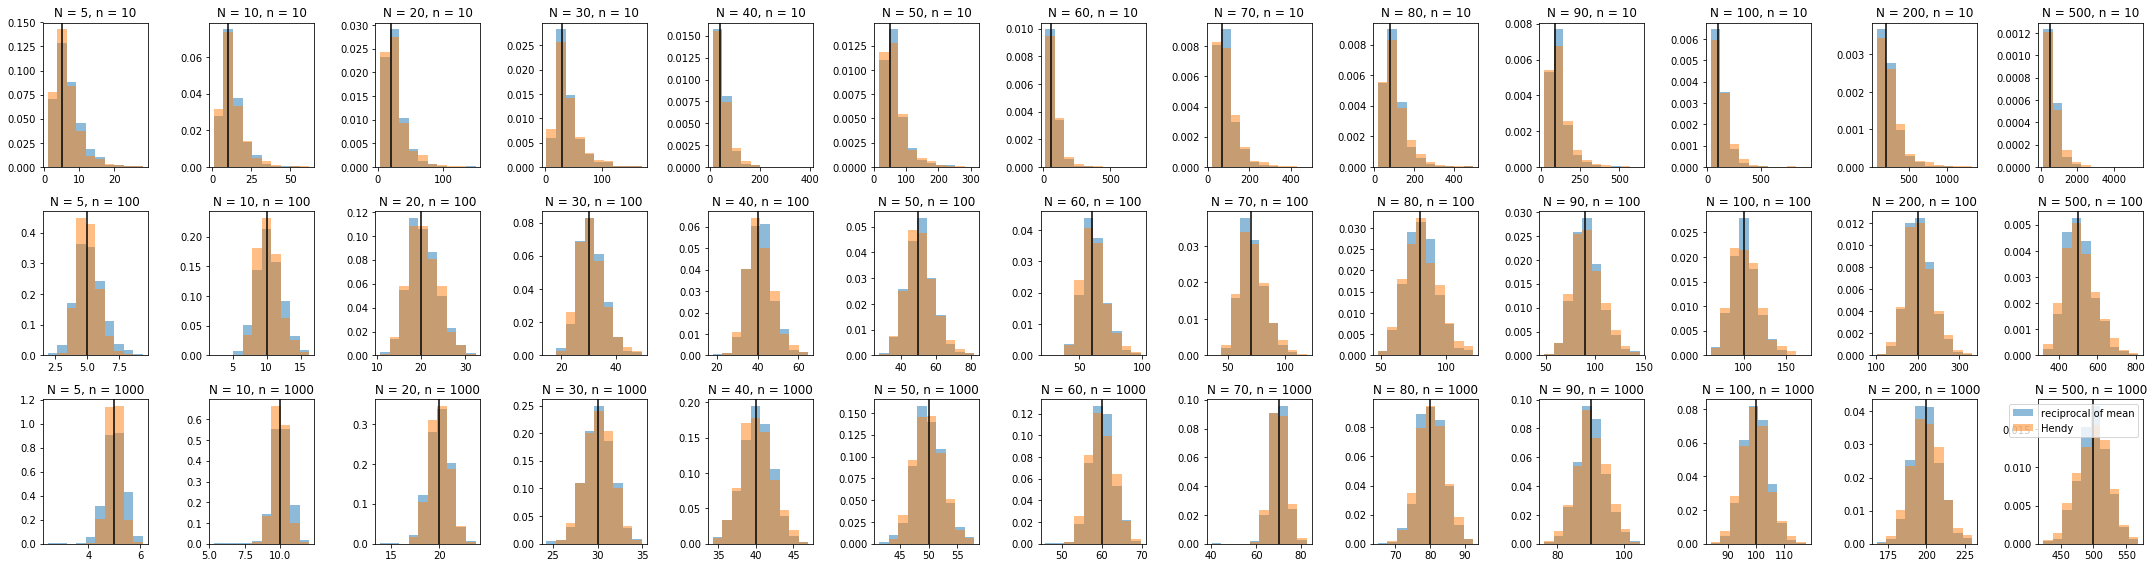

In [198]:
f, axes = plt.subplots(len(ns), len(Ns), figsize=(30,8))
for i, n in enumerate(ns):
    for j, N in enumerate(Ns):
        ax = axes[i,j]
        _, bins, __ = ax.hist(res[n][N][:,0], label='reciprocal of mean', alpha=0.5, normed=True)
        #ax.hist(res[n][N][:,1], label='means of reciprocals', alpha=0.5)
        ax.hist(res[n][N][:,2], label='Hendy', alpha=0.5, bins=bins, normed=True)
        ax.axvline(N, color='black')
        ax.set_title('N = {}, n = {}'.format(N,n))
ax.legend()
f.tight_layout()
plt.savefig('bias_just_recip_means_and_hendy.png', dpi=200)